In [1]:
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import recall_score
from sklearn.naive_bayes import MultinomialNB

from nltk.stem.porter import PorterStemmer
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.metrics import accuracy_score
import warnings
from sklearn.metrics import f1_score
from scipy import sparse
from sklearn.metrics import roc_auc_score

In [2]:
train=pd.read_csv('train')
cv=pd.read_csv('cv')
test=pd.read_csv('test')

In [3]:
train_x=train['CleanedText']
cv_x=cv['CleanedText']
test_x=test['CleanedText']

In [4]:
train_y=train['Score']
cv_y=cv['Score']
test_y=test['Score']

In [5]:
uni_gram = CountVectorizer()
X_train = uni_gram.fit_transform(train_x)

In [6]:
#Loading BoW data

train_bow=sparse.load_npz("train_bow.npz")
cv_bow=sparse.load_npz("cv_bow.npz")
test_bow=sparse.load_npz("test_bow.npz")

In [35]:
def BernouliNB(train_tfidf,train_y,cv_tfidf,cv_y):
    error_list=[]
    best_alpha=0;max_roc_auc=-1
    alpha=[100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001] 
    for i in alpha[-20:]:
        bnb = BernoulliNB(alpha=i)
        bnb.fit(train_tfidf,train_y)
        pred = bnb.predict(cv_tfidf)
        #acc = accuracy_score(cv_y, pred, normalize=True) * float(100)
        roc_auc=(roc_auc_score(cv_y,pred)*100)
        error_list.append(roc_auc-1)
        if(max_roc_auc<roc_auc):
            max_roc_auc=roc_auc
            best_alpha=i
    print(f"\n Best alpha Value {best_alpha} with highest roc_auc Score is {roc_auc}")
    sns.set_style("darkgrid")
    plt.plot(alpha,error_list)
    plt.title(r'Accuracy v/s $\alpha$')
    plt.xlabel(r"alpha values",fontsize=12)
    plt.ylabel("accuracy",fontsize=12)
    plt.show()    

In [18]:
def testBernouli(train,train_y,test_bow,test_y,best_alpha):
    bnb = BernoulliNB(best_alpha)
    bnb.fit(train,train_y)
    pred = bnb.predict(test_bow)
    roc_auc=(roc_auc_score(test_y,pred)*100)
    print(f"best roc auc score is {roc_auc}")
    print("Confusion Matrix of test set:\n [ [TN FN]\n [FP TP] ]\n")

    df_cm = confusion_matrix(test_y,pred)
    sns.set(font_scale=1.4) #for label size                     
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')


 Best alpha Value 1 with highest roc_auc Score is 49.64246328141477


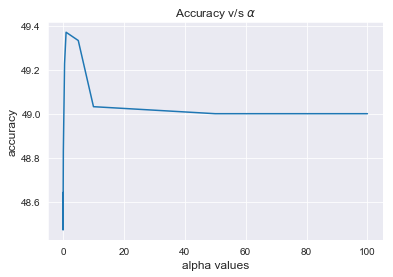

In [16]:
BernouliNB(train_bow,train_y,cv_bow,cv_y) #BoW trianing and Cv

best roc auc score is 49.92769553539152
Confusion Matrix of test set:
 [ [TN FN]
 [FP TP] ]



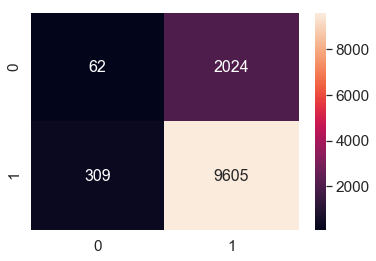

In [19]:
best_alpha=1
testBernouli(train_bow,train_y,test_bow,test_y,best_alpha) #BoW testing

In [25]:
def show_most_informative_features(vectorizer, clf, n=20):
    feature_names = uni_gram.get_feature_names()
    
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    print("\t\t\tPositive\t\t\t\t\tNegative")
    print("________________________________________________________________________________________________")
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        
show_most_informative_features(train_bow,bnb)

			Positive					Negative
________________________________________________________________________________________________
	-19.6946	abhor          				-1.1539	litmus         
	-19.6946	abod           				-1.1600	teeco          
	-19.6946	aborb          				-1.3328	grade          
	-19.6946	aboveour       				-1.3668	lustrous       
	-19.6946	abras          				-1.3970	grown          
	-19.6946	absenc         				-1.4450	flower         
	-19.6946	absoluet       				-1.4484	ordor          
	-19.6946	abysm          				-1.4966	protool        
	-19.6946	academia       				-1.5091	vegetariani    
	-19.6946	acana          				-1.5223	tryptophan     
	-19.6946	accept         				-1.6964	manipularlo    
	-19.6946	accostom       				-1.7050	giraff         
	-19.6946	achiev         				-1.8514	yen            
	-19.6946	acia           				-1.8587	byt            
	-19.6946	actor          				-1.9351	tokyo          
	-19.6946	acupunctur     				-1.9589	amac           
	-19.6946	add            				-

# TF-IDF vectorization

In [28]:
#Loading tf-idf data

train_tfidf=sparse.load_npz("train_tfidf.npz")
cv_tfidf=sparse.load_npz("cv_tfidf.npz")
test_tfidf=sparse.load_npz("test_tfidf.npz")


 Best alpha Value 0.05 with highest roc_auc Score is 73.83571835772688


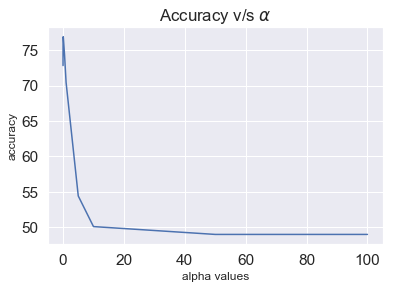

In [30]:
BernouliNB(train_tfidf,train_y,cv_tfidf,cv_y)

best roc auc score is 77.59792702379485
Confusion Matrix of test set:
 [ [TN FN]
 [FP TP] ]



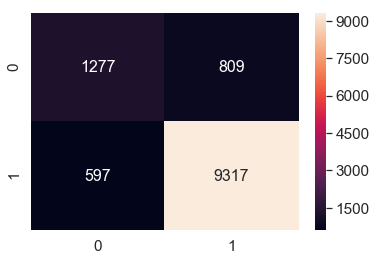

In [31]:
best_alpha=0.05
testBernouli(train_tfidf,train_y,test_tfidf,test_y,best_alpha) #Tf-idf testing

In [34]:
def show_most_informative_features(vectorizer, clf, n=20):
    feature_names = uni_gram.get_feature_names()
    
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    print("\t\t\tPositive\t\t\t\t\tNegative")
    print("________________________________________________________________________________________________")
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        
show_most_informative_features(train_tfidf,bnb)

			Positive					Negative
________________________________________________________________________________________________
	-19.6946	aachen         				-1.1889	likeabl        
	-19.6946	aarrgh         				-1.2055	tasteand       
	-19.6946	abbey          				-1.2798	greater        
	-19.6946	abbrevi        				-1.2799	lovee          
	-19.6946	abdomen        				-1.2854	goodad         
	-19.6946	abhor          				-1.4373	flavorc        
	-19.6946	abrevi         				-1.4592	onec           
	-19.6946	absinth        				-1.4933	usei           
	-19.6946	absolutelt     				-1.5377	triangl        
	-19.6946	abstin         				-1.5654	producto       
	-19.6946	acceptal       				-1.6431	makeov         
	-19.6946	accourd        				-1.6864	getaway        
	-19.6946	accpet         				-1.9116	buy            
	-19.6946	acct           				-1.9129	timefram       
	-19.6946	acesuflamek    				-1.9500	amazon         
	-19.6946	ack            				-1.9674	findabl        
	-19.6946	acknowleg      				-

In [107]:
def mulnb(train,train_y,cv,cv_y):
    best_alpha=0;max_roc_auc=-1
    alpha=[100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001] 
    for i in alpha[-10:]:
        mulbnb = MultinomialNB(alpha=i)
        mulbnb.fit(train,train_y)
        pred = mulbnb.predict(cv)
        #acc = accuracy_score(cv_y, pred, normalize=True) * float(100)
        roc_auc=(roc_auc_score(cv_y,pred)*100)
        if(max_roc_auc<roc_auc):
            max_roc_auc=roc_auc
            best_alpha=i
    print(f"\n Best alpha Value {best_alpha} with highest roc_auc Score is {roc_auc}")
    sns.set_style("darkgrid")
    plt.plot(alpha,error_list)
    plt.title(r'roc_auc v/s $\alpha$')
    plt.xlabel(r"alpha values",fontsize=12)
    plt.ylabel("roc_auc",fontsize=12)
    plt.show()    

In [92]:
def testmulnb(train,train_y,test,test_y,best_alpha):
    bnb = MultinomialNB(best_alpha,fit_prior=True, class_prior=None)
    bnb.fit(train,train_y)
    pred = bnb.predict(test)
    roc_auc=(roc_auc_score(test_y,pred)*100)
    print(f"best roc auc score is {roc_auc}")
    print("Confusion Matrix of test set:\n [ [TN FN]\n [FP TP] ]\n")
    df_cm = confusion_matrix(test_y,pred)
    sns.set(font_scale=1.4) #for label size                     
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
    


 Best alpha Value 5 with highest roc_auc Score is 49.86357275635475


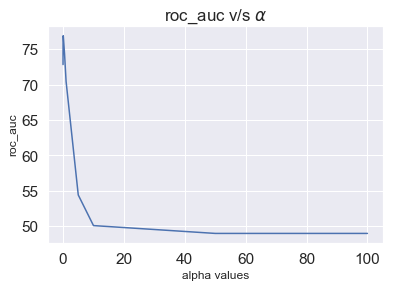

In [93]:
mulnb(train_bow,train_y,cv_bow,cv_y)

best roc auc score is 50.0
Confusion Matrix of test set:
 [ [TN FN]
 [FP TP] ]



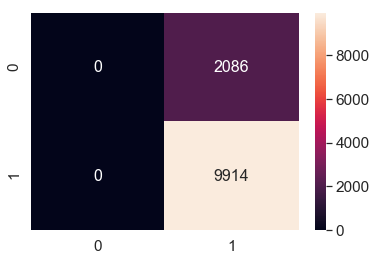

In [94]:
best_alpha=5
testmulnb(train_bow,train_y,test_bow,test_y,best_alpha) #BoW testing

In [102]:
def show_most_informative_features(vectorizer, clf, n=20):
    feature_names = uni_gram.get_feature_names()
    
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    print("\t\t\tPositive\t\t\t\t\tNegative")
    print("________________________________________________________________________________________________")
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        
show_most_informative_features(train_bow,mulbnb)

			Positive					Negative
________________________________________________________________________________________________
	-21.2789	abhor          				-4.3587	teeco          
	-21.2789	abod           				-4.3872	litmus         
	-21.2789	aborb          				-4.5554	grade          
	-21.2789	aboveour       				-4.5573	lustrous       
	-21.2789	abras          				-4.5635	grown          
	-21.2789	absenc         				-4.6280	flower         
	-21.2789	absoluet       				-4.6665	protool        
	-21.2789	abysm          				-4.7603	vegetariani    
	-21.2789	academia       				-4.7763	ordor          
	-21.2789	acana          				-4.8800	tryptophan     
	-21.2789	accept         				-4.9699	collar         
	-21.2789	accostom       				-4.9846	tenderloin     
	-21.2789	achiev         				-5.0820	giraff         
	-21.2789	acia           				-5.0837	manipularlo    
	-21.2789	actor          				-5.1821	byt            
	-21.2789	acupunctur     				-5.2621	yen            
	-21.2789	add            				-


 Best alpha Value 0.01 with highest roc_auc Score is 61.25504009248076


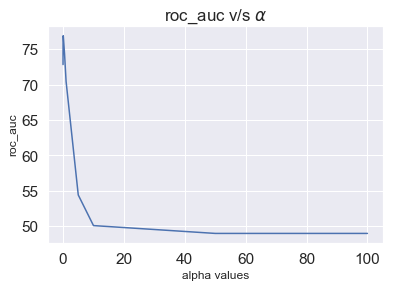

In [97]:
mulnb(train_tfidf,train_y,cv_tfidf,cv_y)

best roc auc score is 60.771329502755336
Confusion Matrix of test set:
 [ [TN FN]
 [FP TP] ]



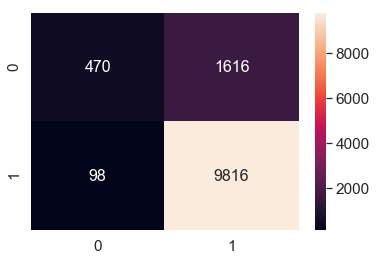

In [98]:
best_alpha=0.01
testmulnb(train_tfidf,train_y,test_tfidf,test_y,best_alpha)

In [105]:
def show_most_informative_features(vectorizer, clf, n=20):
    feature_names = uni_gram.get_feature_names()
    
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    print("\t\t\tPositive\t\t\t\t\tNegative")
    print("________________________________________________________________________________________________")
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        
show_most_informative_features(train_tfidf,mulbnb)

			Positive					Negative
________________________________________________________________________________________________
	-21.2356	aachen         				-5.0522	greater        
	-21.2356	aarrgh         				-5.0695	lovee          
	-21.2356	abbey          				-5.1290	tasteand       
	-21.2356	abbrevi        				-5.1415	goodad         
	-21.2356	abdomen        				-5.1528	likeabl        
	-21.2356	abhor          				-5.1561	teabal         
	-21.2356	abrevi         				-5.2124	flavorc        
	-21.2356	absinth        				-5.2350	coffe          
	-21.2356	absolutelt     				-5.3152	producto       
	-21.2356	abstin         				-5.3283	usei           
	-21.2356	acceptal       				-5.3996	onec           
	-21.2356	accourd        				-5.4874	triangl        
	-21.2356	accpet         				-5.5397	makeov         
	-21.2356	acct           				-5.5943	getaway        
	-21.2356	acesuflamek    				-5.6474	best           
	-21.2356	ack            				-5.6475	pricei         
	-21.2356	acknowleg      				-

In [ ]:
#neg_class_prob_sorted = bnb.feature_log_prob_[0, :].argsort()
#pos_class_prob_sorted = bnb.feature_log_prob_[1, :].argsort()

#print(np.take(uni_gram.get_feature_names(), neg_class_prob_sorted[:10]))
#print(np.take(uni_gram.get_feature_names(), pos_class_prob_sorted[:10]))